In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import Dense, Dropout,GRU
from keras import optimizers 
from sklearn.preprocessing import MinMaxScaler
seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
bitcoin = pd.read_csv('BTC-USD.csv',index_col='Date', parse_dates=['Date'])
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
2020-07-06,9072.849609,9375.474609,9058.664063,9375.474609,9375.474609,17889263252
2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595


In [3]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
2020-07-06,9072.849609,9375.474609,9058.664063,9375.474609,9375.474609,17889263252
2020-07-07,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595
2020-07-08,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
2020-07-09,9431.378906,9431.378906,9355.678711,9357.105469,9357.105469,18319519744


In [5]:
bitcoin.shape

(2123, 6)

In [6]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2123 entries, 2014-09-17 to 2020-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2123 non-null   float64
 1   High       2123 non-null   float64
 2   Low        2123 non-null   float64
 3   Close      2123 non-null   float64
 4   Adj Close  2123 non-null   float64
 5   Volume     2123 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.1 KB


In [7]:
bitcoin.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
bitcoin.duplicated().sum()

0

In [9]:
bitcoin.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2.123000e+03
mean,4185.932266,4294.749473,4069.363555,4190.018268,4190.018268,7.431161e+09
std,4029.791354,4152.358417,3886.728318,4030.549405,4030.549405,1.144642e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,425.334488,432.388504,420.620514,424.749497,424.749497,5.841410e+07
50%,3341.840088,3453.449951,3247.669922,3378.939941,3378.939941,1.537460e+09
75%,7509.315185,7696.606445,7374.902588,7531.821777,7531.821777,1.004265e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,7.415677e+10


In [11]:

df = pd.DataFrame(bitcoin['Close'])
print(' Count row of data: ',len(df))

 Count row of data:  2123


In [12]:
df.describe()

,Close
count,2123.000000
mean,4190.018268
std,4030.549405
min,178.102997
25%,424.749497
50%,3378.939941
75%,7531.821777
max,19497.400391


In [13]:
df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2020-07-05,9073.942383
2020-07-06,9375.474609
2020-07-07,9252.277344


In [14]:

dataset_norm = df.copy()
df[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(df[['Close']])
dataset_norm

,Close
Date,
2014-09-17,0.014453
2014-09-18,0.012751
2014-09-19,0.011216
2014-09-20,0.011947
2014-09-21,0.011425
...,...
2020-07-05,0.460464
2020-07-06,0.476072
2020-07-07,0.469695


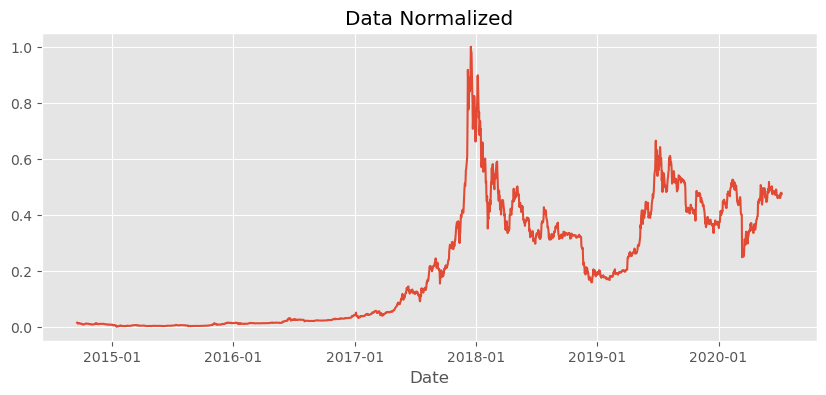

In [16]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Normalized')
plt.show()

In [17]:
from datetime import datetime



In [18]:
# Partition data into data train, val & test
totaldata = df.values
totaldatatrain = int(len(totaldata)*0.7)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.2)

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

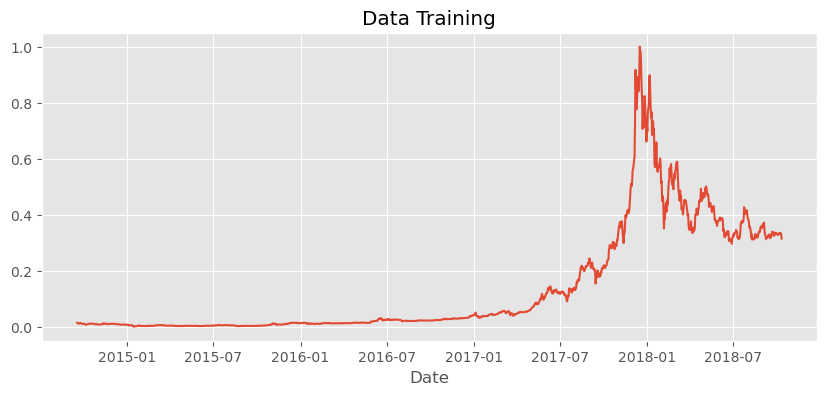

In [19]:
# graph data training
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Training')
plt.show()

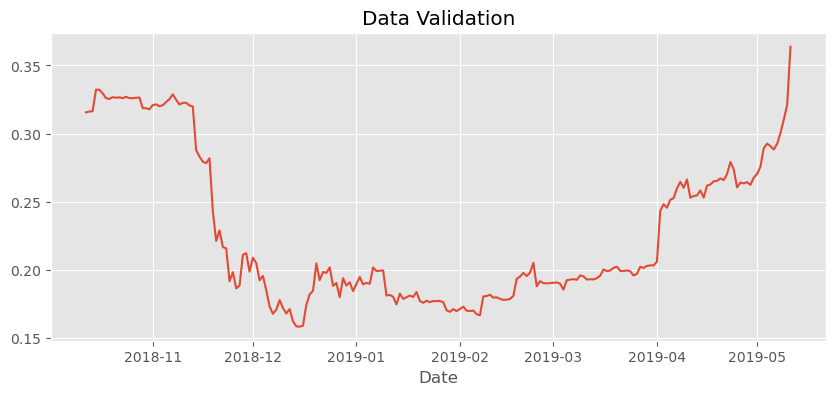

In [20]:

fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Validation')
plt.show()

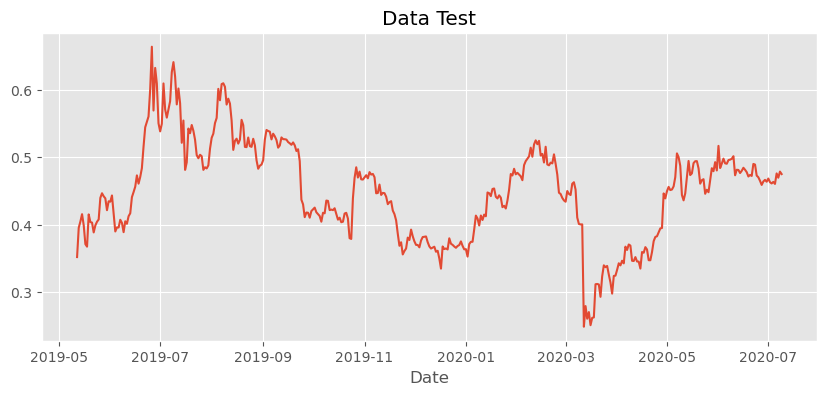

In [21]:

fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Test')
plt.show()

In [22]:

lag = 2
def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0]) 
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)

# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Create sliding windows into validation data
x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [23]:
x_val

array([[[0.31556412],
        [0.31615473]],

       [[0.31615473],
        [0.31641043]],

       [[0.31641043],
        [0.33222932]],

       [[0.33222932],
        [0.33220705]],

       [[0.33220705],
        [0.32953202]],

       [[0.32953202],
        [0.32602671]],

       [[0.32602671],
        [0.32544181]],

       [[0.32544181],
        [0.32667269]],

       [[0.32667269],
        [0.32631865]],

       [[0.32631865],
        [0.32656763]],

       [[0.32656763],
        [0.32597652]],

       [[0.32597652],
        [0.32701691]],

       [[0.32701691],
        [0.32600497]],

       [[0.32600497],
        [0.32592526]],

       [[0.32592526],
        [0.32621667]],

       [[0.32621667],
        [0.32652777]],

       [[0.32652777],
        [0.31856888]],

       [[0.31856888],
        [0.31865377]],

       [[0.31865377],
        [0.31779142]],

       [[0.31779142],
        [0.32090591]],

       [[0.32090591],
        [0.3214577 ]],

       [[0.3214577 ],
        [0.3

In [24]:
y_val

array([0.31641043, 0.33222932, 0.33220705, 0.32953202, 0.32602671,
       0.32544181, 0.32667269, 0.32631865, 0.32656763, 0.32597652,
       0.32701691, 0.32600497, 0.32592526, 0.32621667, 0.32652777,
       0.31856888, 0.31865377, 0.31779142, 0.32090591, 0.3214577 ,
       0.32005081, 0.32082051, 0.32307371, 0.32521404, 0.32879235,
       0.32483672, 0.32131174, 0.32253332, 0.32263943, 0.32056896,
       0.31995922, 0.28780794, 0.2831328 , 0.27938111, 0.27828274,
       0.28186517, 0.24293778, 0.22121752, 0.2289973 , 0.21676963,
       0.21579495, 0.19165588, 0.19834401, 0.18639533, 0.18854811,
       0.21115245, 0.21226153, 0.1987218 , 0.20893974, 0.20506827,
       0.19234798, 0.1955967 , 0.1850943 , 0.17303936, 0.16780291,
       0.17071075, 0.17786006, 0.17208457, 0.16804364, 0.17127161,
       0.16230271, 0.15861767, 0.15832143, 0.15915362, 0.17432113,
       0.18209545, 0.18467792, 0.20478687, 0.19247287, 0.19856207,
       0.19777516, 0.20189638, 0.18827743, 0.19044143, 0.17996

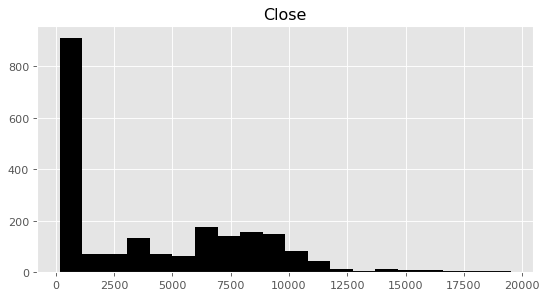

In [25]:
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(df.Close, bins=20, color='k')
plt.title('Close')
plt.show()

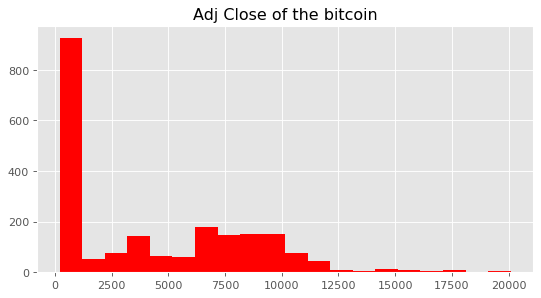

In [26]:
plt.figure(figsize=(8, 4), dpi=80)
plt.hist(bitcoin.High, bins=20, color='r')
plt.title('Adj Close of the bitcoin')
plt.show()

# Model GRU

In [27]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size=256
epoch = 100

# Architecture Gated Recurrent Unit
regressorGRU = Sequential()

# First GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=True, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer with dropout
regressorGRU.add(GRU(units=hidden_unit, return_sequences=False, activation = 'tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the Gated Recurrent Unit
regressorGRU.compile(optimizer=optimizers.Adam(lr=learning_rate),loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorGRU.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch)

Epoch 1/100



6/6 [==============================] - 12s 353ms/step - loss: 0.0391 - val_loss: 0.0047
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0239 - val_loss: 0.0012
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0108 - val_loss: 0.0031
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0032 - val_loss: 1.7625e-04
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 2.1882e-04
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0024 - val_loss: 9.3258e-04
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0017 - val_loss: 1.7845e-04
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0018 - val_loss: 2.4800e-04
Epoch 9/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0012 - val_loss: 1.8533e-04
Epoch 10/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 1.1021e-04
E

Epoch 79/100
6/6 [==============================] - 0s 28ms/step - loss: 7.5539e-04 - val_loss: 9.1181e-05
Epoch 80/100
6/6 [==============================] - 0s 25ms/step - loss: 7.7951e-04 - val_loss: 9.6169e-05
Epoch 81/100
6/6 [==============================] - 0s 28ms/step - loss: 6.6386e-04 - val_loss: 9.1607e-05
Epoch 82/100
6/6 [==============================] - 0s 28ms/step - loss: 7.3749e-04 - val_loss: 9.8903e-05
Epoch 83/100
6/6 [==============================] - 0s 25ms/step - loss: 7.3175e-04 - val_loss: 1.1439e-04
Epoch 84/100
6/6 [==============================] - 0s 28ms/step - loss: 7.6599e-04 - val_loss: 9.7676e-05
Epoch 85/100
6/6 [==============================] - 0s 28ms/step - loss: 7.6703e-04 - val_loss: 9.8028e-05
Epoch 86/100
6/6 [==============================] - 0s 25ms/step - loss: 7.9489e-04 - val_loss: 9.1854e-05
Epoch 87/100
6/6 [==============================] - 0s 25ms/step - loss: 6.9604e-04 - val_loss: 9.5967e-05
Epoch 88/100
6/6 [===================

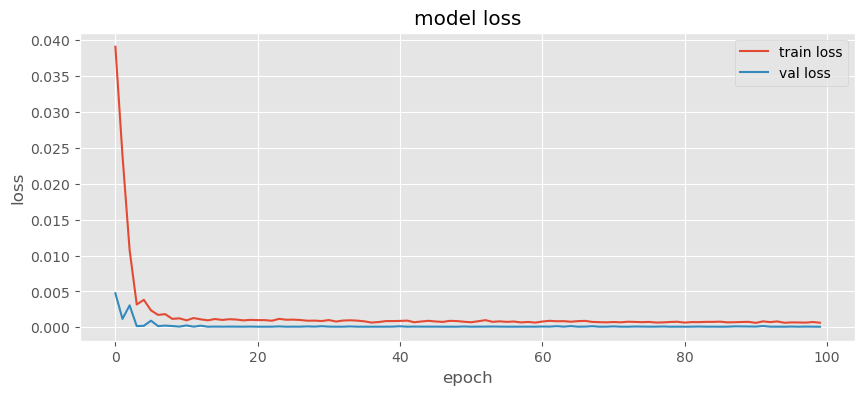

In [28]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [29]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.000649,0.000091


In [30]:
# Implementation model into data test
y_pred_test = regressorGRU.predict(x_test)

# Invert normalization min-max
y_pred_invert_norm = scaler.inverse_transform(y_pred_test)


14/14 [==============================] - 1s 5ms/step


In [31]:
# Comparison data test with data prediction
datacompare = pd.DataFrame()
df=np.array(df['Close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred_invert_norm

datacompare['Data Test'] = df
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,7994.416016,7263.491211
1,8205.167969,7829.762695
2,7884.909180,8015.043457
3,7343.895508,8018.843262
4,7271.208008,7625.935547
...,...,...
418,9073.942383,9005.127930
419,9375.474609,9009.705078
420,9252.277344,9088.106445
421,9428.333008,9218.490234


In [32]:
# Calculatre value of Root Mean Square Error
from sklearn.metrics import r2_score
def rmse(df, datapred):
    return np.round(np.sqrt(np.mean((datapred - df) ** 2)), 4)
print('Root Mean Square Error :',rmse(df, datapred))

def mape(datatest, datapred): 
    return np.round(np.mean(np.abs((df - datapred) / df) * 100), 4)
    
print('Mean Absolute Percentage Error : ', mape(df, datapred), '%')
print(r2_score(df, datapred))

Root Mean Square Error : 1947.2894
Mean Absolute Percentage Error :  18.1975 %
0.911620038403949


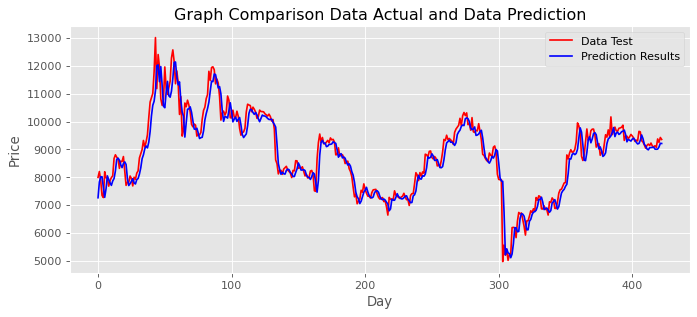

In [33]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [34]:
import pickle
filename='bitcoin.sav'
pickle.dump(regressorGRU ,open('bitcoin.sav','wb'))
loaded_model=pickle.load(open('bitcoin.sav','rb'))